Засоби підготовки та аналіз даних
Лабораторна робота №4
ФБ-33 Сенчило Олексій

Мета: отримати навички роботи із структурами для зберігання в Python
(python, numpy, pandas, numpy array, dataframe, timeit)

Хід роботи
Завантажив необхідні бібліотеки

In [ ]:
import os
import time
import timeit
import urllib.request
from datetime import datetime
import zipfile
import pandas as pd
import numpy as np 
import missingno as ms
print("Setup Completed")

Завантаження файлу з сайту та розпакування його

In [56]:
def download_csv(directory):
    url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
    retries = 3
    for attempt in range(retries):
        try:
            with urllib.request.urlopen(url) as wp:
                text = wp.read()
            break
        except urllib.error.URLError as e:
            print(f"Error downloading data: {e}")
            if attempt < retries - 1:
                print(f"Retrying download in 5 seconds...")
                time.sleep(5)
            else:
                print(f"Failed to download data after {retries} attempts.")
                continue

    filename = f'Individual_Household_Electric_Power_Consumption.zip'
    filepath = os.path.join(directory, filename)

    try:
        with open(filepath, 'wb') as out:
            out.write(text)
        print(f"Process is downloading:\nfile_zip:{filename}...\n")
        print(f"File_zip:{filename} downloaded successfully.")
        print("=" * 80)
    except IOError as e:
        print(f"Error writing file {filename}: {e}")

def unzip(directory):
    zip_file = os.path.join(directory, "Individual_Household_Electric_Power_Consumption.zip")
    new_filename = "Individual_Household_Electric_Power_Consumption.txt"

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory)

    for filename in os.listdir(directory):
        if filename.endswith(".txt") and filename != new_filename:
            os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))

    if os.path.exists(zip_file):
        os.remove(zip_file)

    print(f"Files extracted and renamed to {new_filename} successfully.")

def clean_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("[+] Directory created successfully.")

    if input("Do you want to clean the directory? (y/n): ").lower() == 'y':
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            if os.path.exists(filepath):
                os.unlink(filepath)
        print("[+] Directory cleaned successfully.\n")
    else:
        print("[+] Directory cleaning skipped.\n")

In [58]:
directory="C:/Users/GORO/Desktop/АПЗ/Lab_4/Individual_Household_Electric_Power_Consumption_Data/"
clean_directory(directory)
download_csv(directory)
unzip(directory)

Do you want to clean the directory? (y/n):  y


[+] Directory cleaned successfully.

Process is downloading:
file_zip:Individual_Household_Electric_Power_Consumption.zip...

File_zip:Individual_Household_Electric_Power_Consumption.zip downloaded successfully.
Files extracted and renamed to Individual_Household_Electric_Power_Consumption.txt successfully.


Змінив розширення з csv на txt

In [60]:
def read_to_csv(filepath, delimiter=';'):  
    try:
        data_frame = pd.read_csv(filepath, delimiter=delimiter)
        data_frame.to_csv(filepath, index=False)
        data_frame.info()
    except Exception as e:
        print(f"Error reading CSV file: {e}")

In [62]:
filepath = "C:/Users/GORO/Desktop/АПЗ/Lab_4/Individual_Household_Electric_Power_Consumption_Data/Individual_Household_Electric_Power_Consumption.txt"
read_to_csv(filepath)

C:\Temp\ipykernel_17432\2938010626.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv(filepath, delimiter=delimiter)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Зчитав дані з використанням NumPy щоб працювати як з даними так і з масивами

In [64]:
def read_with_numpy(filepath, delimiter=';', save_csv=False, save_path=None):
    try:
        data_numpy = np.genfromtxt(filepath, delimiter=delimiter, dtype=None, encoding=None)
        if save_csv and save_path is not None:
            np.savetxt(save_path, data_numpy, delimiter=',', fmt='%s')
            print("Data saved to CSV file:", save_path)
        
        return data_numpy
    
    except Exception as e:
        print(f"Error reading CSV file with NumPy: {e}")
        return None

In [66]:
filepath = "C:/Users/GORO/Desktop/АПЗ/Lab_4/Individual_Household_Electric_Power_Consumption_Data/Individual_Household_Electric_Power_Consumption.txt"
read_with_numpy(filepath)

array(['Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3',
       '16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0',
       '16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0',
       ..., '26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0',
       '26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0',
       '26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0'],
      dtype='<U121')

Очистив та перетворив тип даних на float

In [68]:
def data_cleaning(filepath):
    Dtype = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }
    data_frame = pd.read_csv(filepath, dtype=Dtype, na_values='?')
    ms.matrix(data_frame)
    data_frame.dropna(inplace=True)
    data_frame['Date'] = pd.to_datetime(data_frame['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    data_frame['Time'] = pd.to_datetime(data_frame['Time'], format='%H:%M:%S').dt.time
    data_frame_numpy = data_frame.to_numpy()
    
    return data_frame, data_frame_numpy 

Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:24:00 |        4.216        |         0.418         | 234.84  |       18.4       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:25:00 |        5.36         |         0.436         | 233.63  |       23.0       |      0.0       |      1.0       |      16.0      |
| 2006-12-16 | 17:26:00 |        5.374        |         0.498         | 233.29  |       23.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:27:00 |        5.388        |         0.502

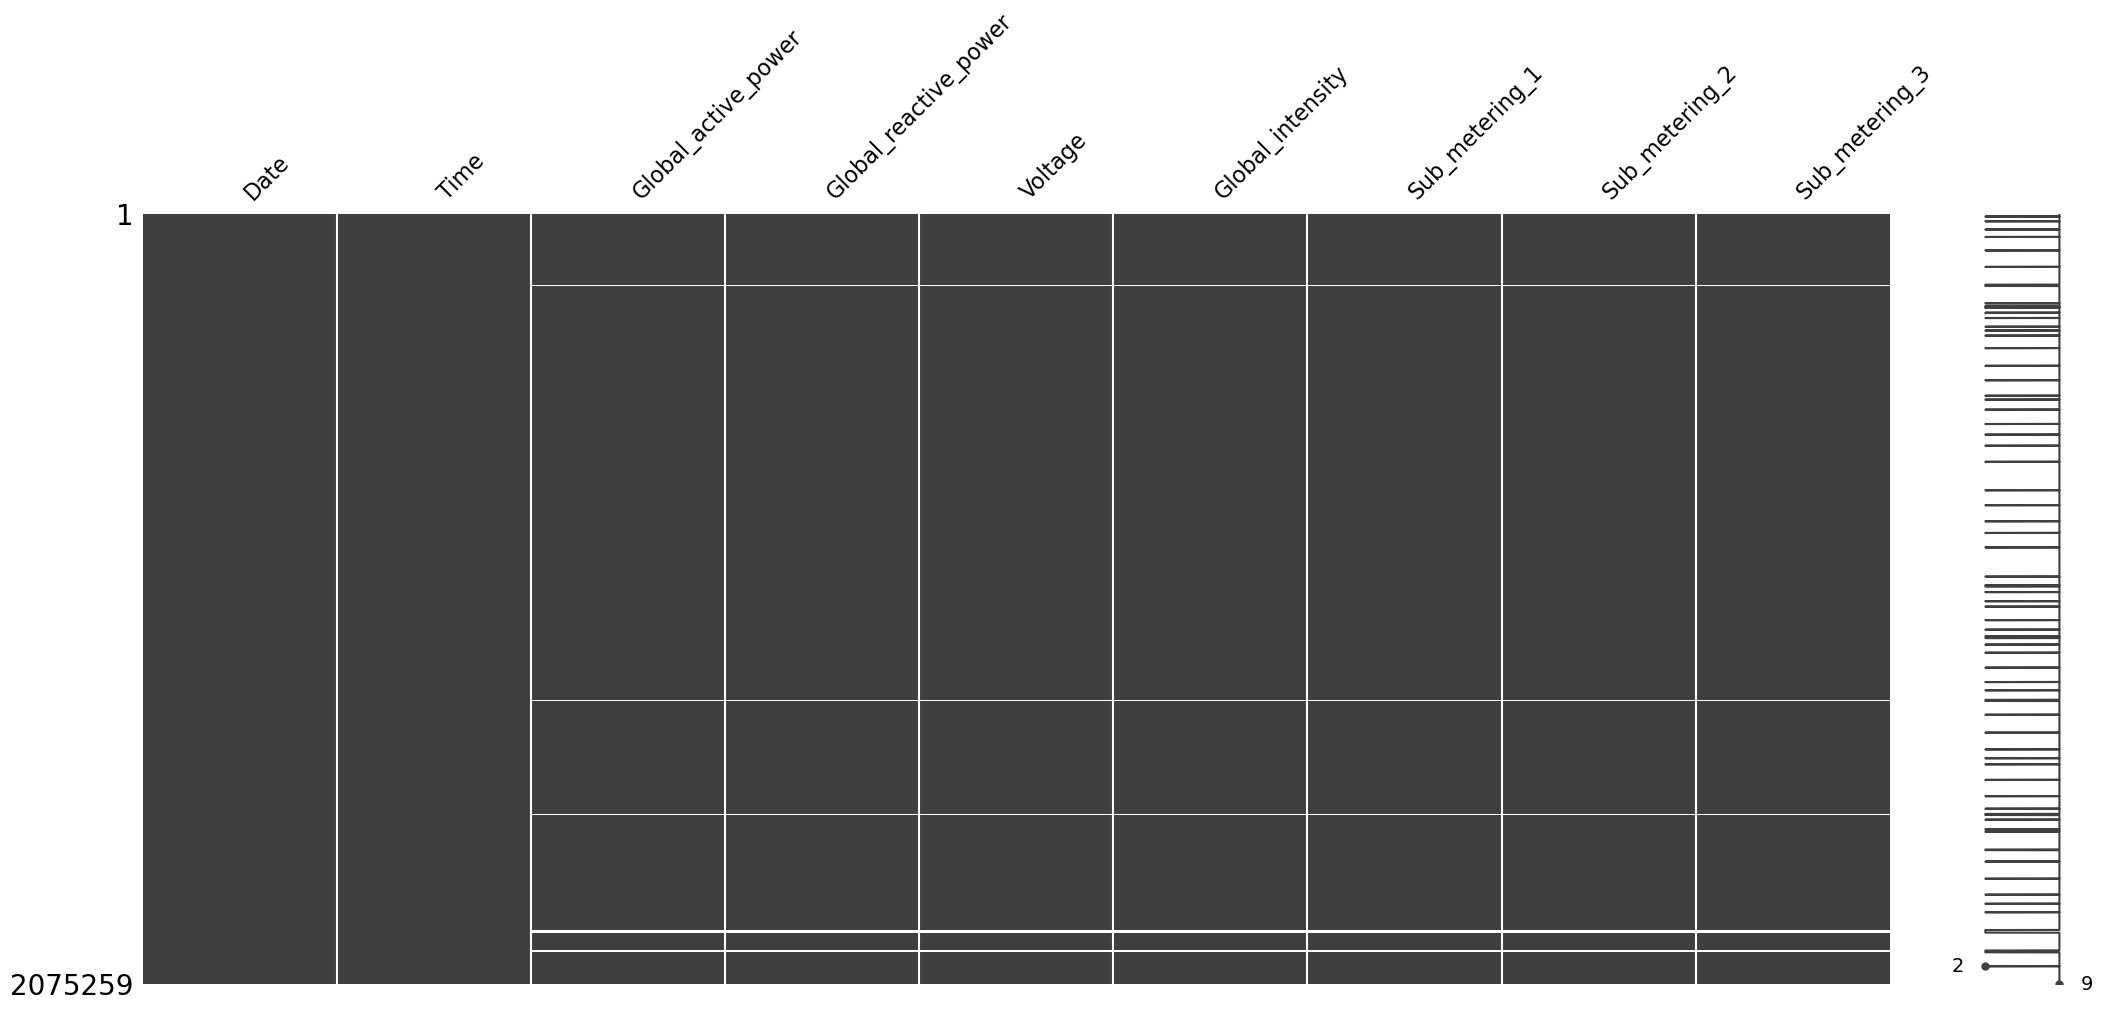

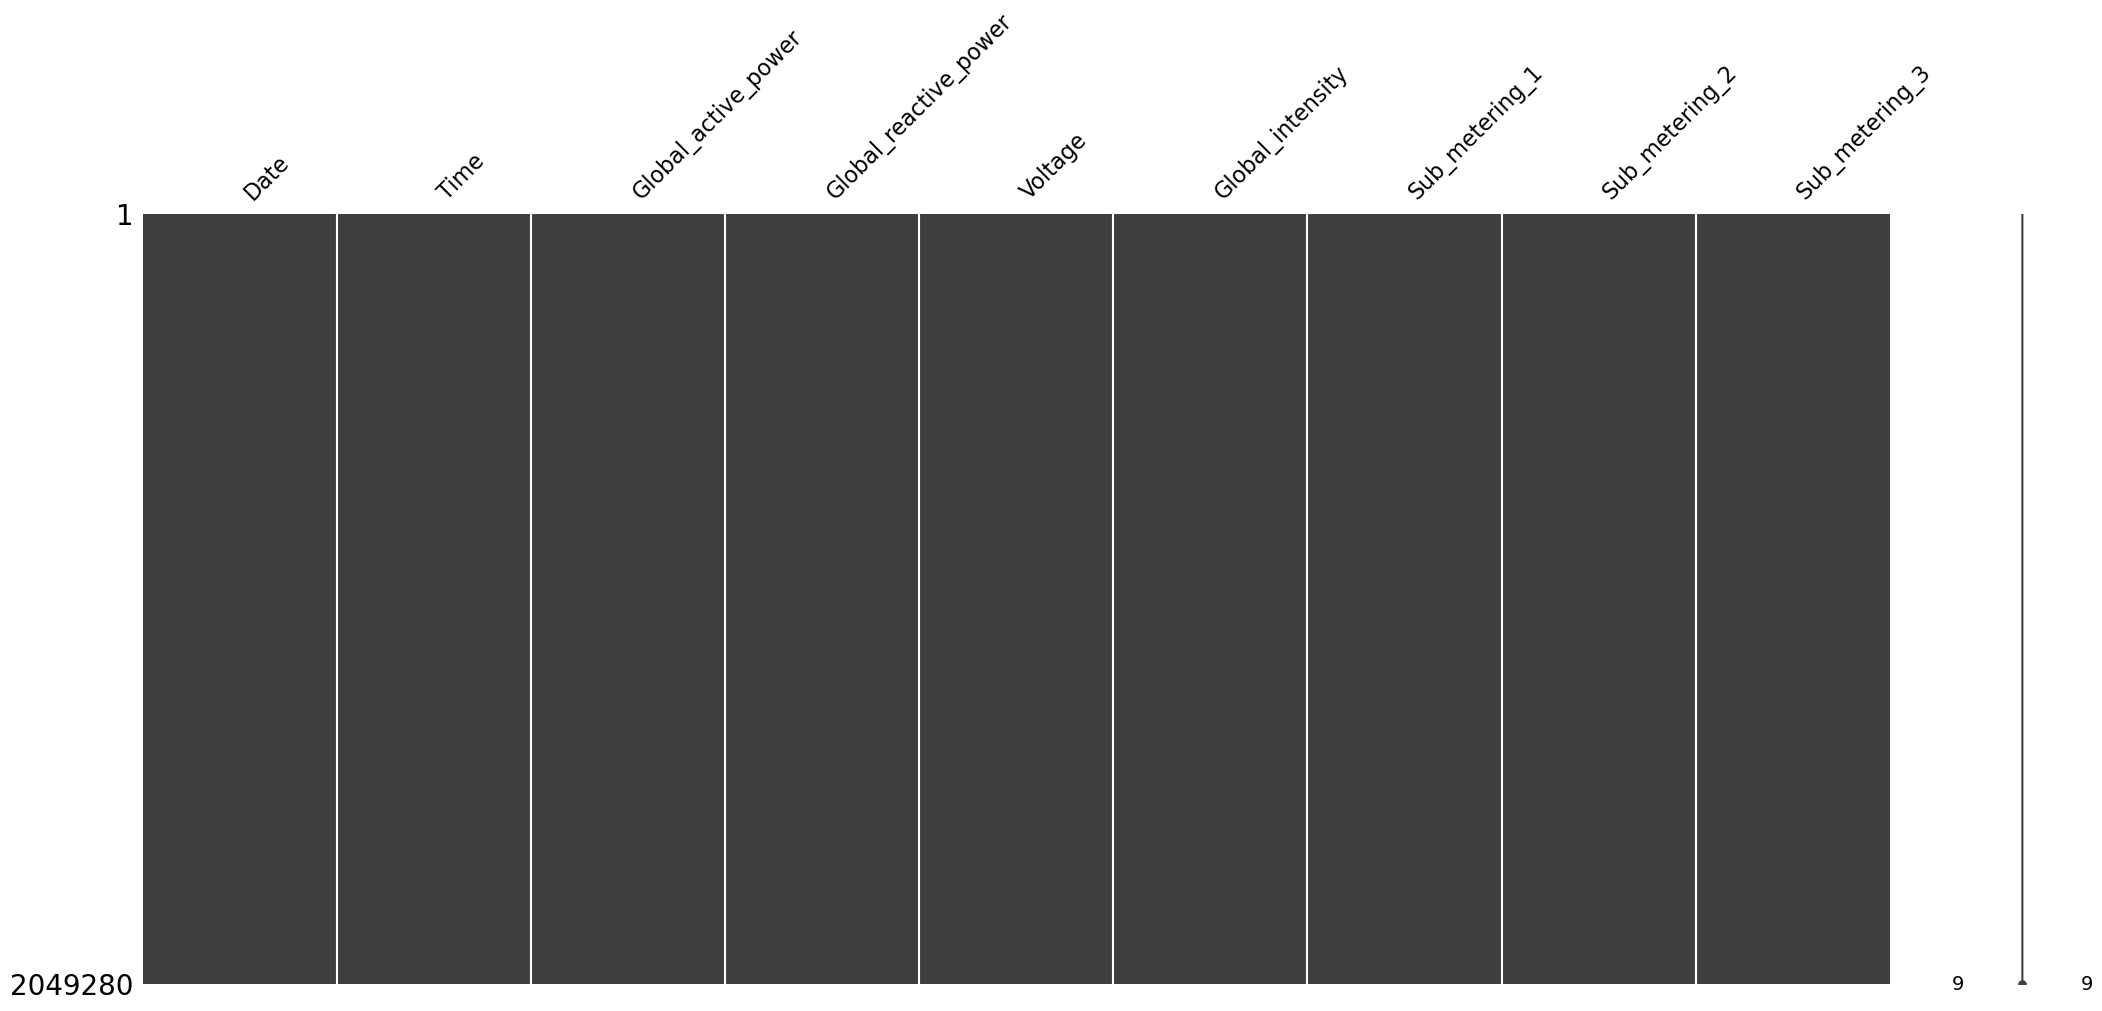

In [70]:
filepath = "C:/Users/GORO/Desktop/АПЗ/Lab_4/Individual_Household_Electric_Power_Consumption_Data/Individual_Household_Electric_Power_Consumption.txt"

from tabulate import tabulate
cleaned_data_frame, cleaned_data_frame_numpy = data_cleaning(filepath)

def print_head(data):
    if isinstance(data, pd.DataFrame):
        table_data = data.head(15).values.tolist()
        headers = data.columns.tolist()
        print("Перші 15 рядків DataFrame:")
        print(tabulate(table_data, headers=headers, tablefmt='pretty'))
    elif isinstance(data, np.ndarray):
        table_data = data[:15].tolist()
        print("Перші 15 рядків NumPy масиву:")
        print(tabulate(table_data, tablefmt='pretty'))
    else:
        print("Непідтримуваний тип даних. Підтримуються лише DataFrame або NumPy масив.")

ms.matrix(cleaned_data_frame)

print_head(cleaned_data_frame)
print_head(cleaned_data_frame_numpy)

1) Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [72]:
def household_df(cleaned_data_frame):
    def filter_func():
        return cleaned_data_frame[cleaned_data_frame["Global_active_power"] > 5.0]

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для DataFrame (timeit):", execution_time / 10)
    return filter_func()

def household_numpy(cleaned_data_frame_numpy):
    def filter_func():
        indices = np.where(cleaned_data_frame_numpy[:, 2] > 5)
        return cleaned_data_frame_numpy[indices]

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для NumPy:", execution_time / 10)
    return filter_func()

In [74]:
household_df_result = household_df(cleaned_data_frame)
household_numpy_result = household_numpy(cleaned_data_frame_numpy)
print_head(household_df_result)
print_head(household_numpy_result) 

Середній час виконання для DataFrame (timeit): 0.005959699998493306
Середній час виконання для NumPy: 0.05579613999871071
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:25:00 |        5.36         |         0.436         | 233.63  |       23.0       |      0.0       |      1.0       |      16.0      |
| 2006-12-16 | 17:26:00 |        5.374        |         0.498         | 233.29  |       23.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:27:00 |        5.388        |         0.502         | 233.74  |       23.

2) Обрати всі записи, у яких вольтаж перевищую 235 В.

In [76]:
def household_df_2(cleaned_data_frame):
    def filter_func():
        return cleaned_data_frame[cleaned_data_frame["Voltage"] > 235]

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для DataFrame:", execution_time / 10)
    return filter_func()

def household_numpy_2(cleaned_data_frame_numpy):
    def filter_func():
        indices = np.where(cleaned_data_frame_numpy[:, 4] > 235)
        return cleaned_data_frame_numpy[indices]

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для NumPy:", execution_time / 10)
    return filter_func()

In [78]:
household_df_result_2 = household_df_2(cleaned_data_frame)
household_numpy_result_2 = household_numpy_2(cleaned_data_frame_numpy)
print_head(household_df_result_2)
print_head(household_numpy_result_2) 

Середній час виконання для DataFrame: 0.13398374000098556
Середній час виконання для NumPy: 0.19901117999979762
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:28:00 |        3.666        |         0.528         | 235.68  |       15.8       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:29:00 |        3.52         |         0.522         | 235.02  |       15.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:30:00 |        3.702        |         0.52          | 235.09  |       15.8       | 

3) Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [79]:
def household_df_3(cleaned_data_frame):
    def filter_func():
        filtered = cleaned_data_frame[
            (cleaned_data_frame["Global_intensity"] >= 19) &
            (cleaned_data_frame["Global_intensity"] <= 20)
        ]
        return filtered[filtered["Sub_metering_2"] > filtered["Sub_metering_3"]]

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для DataFrame:", execution_time / 10)
    return filter_func()

def household_numpy_3(cleaned_data_frame_numpy):
    def filter_func():
        filtered = cleaned_data_frame_numpy[
            (cleaned_data_frame_numpy[:, 5] >= 19) &
            (cleaned_data_frame_numpy[:, 5] <= 20)
        ]
        return filtered[filtered[:, 7] > filtered[:, 8]]

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для NumPy:", execution_time / 10)
    return filter_func()  

In [82]:
household_df_result_3 = household_df_3(cleaned_data_frame)
household_numpy_result_3 = household_numpy_3(cleaned_data_frame_numpy)
print_head(household_df_result_3)
print_head(household_numpy_result_3) 

Середній час виконання для DataFrame: 0.01017164000077173
Середній час виконання для NumPy: 0.11000150000036228
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 18:09:00 |        4.464        |         0.136         | 234.66  |       19.0       |      0.0       |      37.0      |      16.0      |
| 2006-12-17 | 01:04:00 |        4.582        |         0.258         | 238.08  |       19.6       |      0.0       |      13.0      |      0.0       |
| 2006-12-17 | 01:08:00 |        4.618        |         0.104         | 239.61  |       19.6       | 

In [84]:
def household_df_4(data_frame, n_samples=500000):
    def filter_func():
        sample = data_frame.sample(n=n_samples, replace=False)
        return sample[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для DataFrame:", execution_time / 10)
    return filter_func()

def household_numpy_4(data_frame_numpy, n_samples=500000):
    def filter_func():
        indices = np.random.choice(data_frame_numpy.shape[0], size=n_samples, replace=False)
        sample = data_frame_numpy[indices]
        return np.mean(sample[:, 6:9], axis=0)

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для NumPy:", execution_time / 10)
    return filter_func()

In [86]:
household_df_result_4 = household_df_4(cleaned_data_frame)
household_numpy_result_4 = household_numpy_4(cleaned_data_frame_numpy)
print("\nDataFrame результати:")
print("--------------------------------------------")
print("Sub_metering_1:", household_df_result_4["Sub_metering_1"])
print("Sub_metering_2:", household_df_result_4["Sub_metering_2"])
print("Sub_metering_3:", household_df_result_4["Sub_metering_3"])
print()

print("NumPy результати:")
print("--------------------------------------------")
print(household_numpy_result_4)
print()

Середній час виконання для DataFrame: 0.18239410999813116
Середній час виконання для NumPy: 0.44374966000032146

DataFrame результати:
--------------------------------------------
Sub_metering_1: 1.11975
Sub_metering_2: 1.290662
Sub_metering_3: 6.448768

NumPy результати:
--------------------------------------------
[1.114886 1.301828 6.466558]



In [88]:
def household_df_5(cleaned_data_frame):
    def filter_func():
        selected = cleaned_data_frame[
            (cleaned_data_frame['Time'] > datetime.strptime('18:00:00', '%H:%M:%S').time()) &
            (cleaned_data_frame['Global_active_power'] > 6) &
            (cleaned_data_frame['Sub_metering_2'] > cleaned_data_frame['Sub_metering_1']) &
            (cleaned_data_frame['Sub_metering_2'] > cleaned_data_frame['Sub_metering_3'])
        ]
        mid = len(selected) // 2
        g1 = selected.iloc[:mid].iloc[::3]
        g2 = selected.iloc[mid:].iloc[::4]
        return pd.concat([g1, g2])

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для DataFrame:", execution_time / 10)
    return filter_func()


def household_numpy_5(cleaned_data_frame_numpy):
    def filter_func():
        selected = cleaned_data_frame_numpy[
            cleaned_data_frame_numpy[:, 1] > datetime.strptime('18:00:00', '%H:%M:%S').time()
        ]
        selected = selected[selected[:, 2] > 6]
        selected = selected[
            (selected[:, 7] > selected[:, 6]) & (selected[:, 7] > selected[:, 8])
        ]
        mid = len(selected) // 2
        g1 = selected[:mid][::3]
        g2 = selected[mid:][::4]
        return np.concatenate([g1, g2])

    execution_time = timeit.timeit(filter_func, number=10)
    print("Середній час виконання для NumPy:", execution_time / 10)
    return filter_func()

In [90]:
household_df_result_5 = household_df_5(cleaned_data_frame)
print_head(household_df_result_5) 

household_numpy_result_5 = household_numpy_5(cleaned_data_frame_numpy)
print_head(household_numpy_result_5) 

Середній час виконання для DataFrame: 0.1124348099983763
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 18:05:00 |        6.052        |         0.192         | 232.93  |       26.2       |      0.0       |      37.0      |      17.0      |
| 2006-12-16 | 18:08:00 |        6.308        |         0.116         | 232.25  |       27.0       |      0.0       |      36.0      |      17.0      |
| 2006-12-28 | 20:58:00 |        6.386        |         0.374         | 236.63  |       27.0       |      1.0       |      36.0      |      17.0      |
| 20